This post is attempt to list most of the regular commands used in python through a simple project. In this project, we will analyze some fake data in Excel format. To clean the data, we have to remove all ‘NA’ records and duplicated rows, we will also add Date and caculated columns into the data. After we get the tidy data, we will do some basic aggregation, statistic and plotting analysis. I have done the exactanalysis with R. Please refe to https://rpubs.com/DBSnail/169473

# Load data

In [1]:
#Import related packages
import pandas as pd

In [94]:
file = r'C:/Users/jli/Documents/MyNotes/Projects/HealthData1.xlsx'
health_data = pd.read_excel(file)

In [95]:
health_data.head()

,Name,Height,Weight,Age,Sex
0,Karen,162,62,34,F
1,Halen,173,73,43,F
2,Alen,156,52,45,M
3,John,178,62,35,M
4,Kim,165,70,45,F


In [96]:
health_data2 = pd.read_excel(r'C:/Users/jli/Documents/MyNotes/Projects/HealthData2.xlsx')
health_data2.head()

,Name,Height,Weight,Age,VisitDate,Sex
0,Halen,173,73,44,2016-04-09,F
1,Kun,180,90,60,2016-04-01,M
2,Tom,168,56,49,2016-04-02,M


# Explore data

In [97]:
#Shwo the first 2 rows data
health_data.head(2)

,Name,Height,Weight,Age,Sex
0,Karen,162,62,34,F
1,Halen,173,73,43,F


In [98]:
#Show the column name
health_data.columns

Index([u'Name ', u'Height', u'Weight', u'Age', u'Sex'], dtype='object')

In [99]:
#Show the average height
health_data.Height.mean()

169.63636363636363

In [100]:
#Show the maximal age.
health_data.Age.max()

54

In [111]:
#Show karen's information with index
health_data.ix[0]

Name      Karen
Height      162
Weight       62
Age          34
Sex           F
Name: 0, dtype: object

In [103]:
#Show karen's information by subsetting column name 
#You have to rename it, don't know why?
col_name =health_data.columns[0]
health_data=health_data.rename(columns = {col_name:'Name'})
health_data[health_data.Name == 'Karen']

,Name,Height,Weight,Age,Sex
0,Karen,162,62,34,F


In [123]:
#Update Karen's Weight to 78
health_data['Weight'].loc[0] = 78
health_data[health_data.Name == 'Karen']

,Name,Height,Weight,Age,Sex
0,Karen,162,78,34,F


In [124]:
#Show the information of patients whose age is above 50
health_data[health_data.Age > 50]

,Name,Height,Weight,Age,Sex
8,Kenkirk,178,75,54,M
9,George,176,72,52,M


In [131]:
#Show the name and Height of patients whose Height is above 170
health_data[health_data.Height > 170].ix[ : ,['Name', 'Height']]

,Name,Height
1,Halen,173
3,John,178
8,Kenkirk,178
9,George,176
10,James,189


In [134]:
#Show Alen and John's information with isin
health_data[health_data['Name'].isin(['Alen' , 'John'])]

,Name,Height,Weight,Age,Sex
2,Alen,156,52,45,M
3,John,178,62,35,M


In [145]:
#Add one 'VisitDate' column
health_data['VisitDate'] = '02/20/2016' # 00:00:00.000', format='%m%d%Y %H:%M:%S.%f)
health_data.head(2)

,Name,Height,Weight,Age,Sex,VisitDate
0,Karen,162,78,34,F,02/20/2016
1,Halen,173,73,43,F,02/20/2016


# Combine data

NOTE: for health_data, the VisitDate is 'string' format. For health_data2, the Name need to be rename and 
      the 'NA" has to be removed'

In [159]:
#remove all records with 'NA'
health_data2.dropna()

,Name,Height,Weight,Age,VisitDate,Sex
0,Halen,173,73,44,2016-04-09,F
1,Kun,180,90,60,2016-04-01,M
2,Tom,168,56,49,2016-04-02,M


In [160]:
#We have to convert the first column 'Name'
col_name =health_data2.columns[0]
health_data2=health_data2.rename(columns = {col_name:'Name'})
health_data2

,Name,Height,Weight,Age,VisitDate,Sex
0,Halen,173,73,44,2016-04-09,F
1,Kun,180,90,60,2016-04-01,M
2,Tom,168,56,49,2016-04-02,M


In [167]:
#Convert the Visitdate to DateTime
health_data['VisitDate'] =pd.to_datetime(health_data['VisitDate'], format='%m/%d/%Y')

health_data.head(2)

,Name,Height,Weight,Age,Sex,VisitDate
0,Karen,162,78,34,F,2016-02-20
1,Halen,173,73,43,F,2016-02-20


In [166]:
#combine health_data and health_data2, don't forget the axis =0 
df = pd.concat([health_data, health_data2],axis=0)
df.head(2)

,Age,Height,Name,Sex,VisitDate,Weight
0,34,162,Karen,F,2016-02-20,78
1,43,173,Halen,F,2016-02-20,73


# Remove duplicated rows

Find duplicate rows by assuming no patient has same name, select the record with the most recent VisitDate 
if there are any duplicated rows.

In [212]:
df.shape

(14, 6)

In [211]:
#group by name and maximize the Visitdate
group = df.groupby(df['Name'], as_index = False).VisitDate.max()
#merge two datasets according to Name and VisitDate
f_df = pd.merge(df, pd.DataFrame(group), on =['Name', 'VisitDate'])
f_df.shape

(13, 6)

# Add a calculated column

In [217]:
#Add a 'BMI' column into the dataset
f_df['BMI'] = (f_df['Weight']) /((f_df['Height']/100.0)**2)
f_df.head(2)

,Age,Height,Name,Sex,VisitDate,Weight,BMI
0,34,162,Karen,F,2016-02-20,78,29.721079
1,45,156,Alen,M,2016-02-20,52,21.367521


In [228]:
#Show BMI between 25 and 30  using query function
f_df.query('BMI > 25 & BMI < 30')

,Age,Height,Name,Sex,VisitDate,Weight,BMI
0,34,162,Karen,F,2016-02-20,78,29.721079
3,45,165,Kim,F,2016-02-20,70,25.711662
4,39,167,Jean,F,2016-02-20,75,26.892323
5,35,157,Kirk,M,2016-02-20,64,25.964542
9,30,189,James,M,2016-02-20,90,25.195263
11,60,180,Kun,M,2016-04-01,90,27.777778


In [229]:
#Show BMI between 25 and 30  using subsetting
f_df[(f_df['BMI'] > 25) & (f_df['BMI'] < 30)]

,Age,Height,Name,Sex,VisitDate,Weight,BMI
0,34,162,Karen,F,2016-02-20,78,29.721079
3,45,165,Kim,F,2016-02-20,70,25.711662
4,39,167,Jean,F,2016-02-20,75,26.892323
5,35,157,Kirk,M,2016-02-20,64,25.964542
9,30,189,James,M,2016-02-20,90,25.195263
11,60,180,Kun,M,2016-04-01,90,27.777778


# Aggregate and Statistic Analysis

In [237]:
#Show total male and female patients
f_df['Sex'].groupby(f_df['Sex']).count()

Sex
F    5
M    8
dtype: int64

In [238]:
#Show average BMI and its sd of male and female
f_df['BMI'].groupby(f_df['Sex']).mean()

Sex
F    25.677476
M    23.328708
Name: BMI, dtype: float64

In [243]:
f_df['BMI'].groupby(f_df['Sex']).std()

Sex
F    2.980453
M    2.939875
Name: BMI, dtype: float64

# Plot the data

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 2.,  2.,  3.,  3.,  2.,  1.]),
 array([ 19.56823633,  21.2603768 ,  22.95251726,  24.64465772,
         26.33679818,  28.02893864,  29.7210791 ]),
 <a list of 6 Patch objects>)

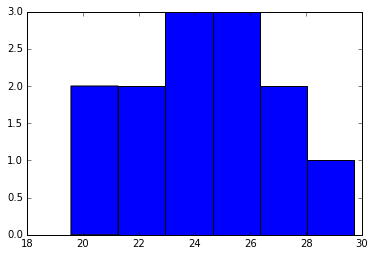

In [258]:
plt.hist(f_df['BMI'], bins =6)

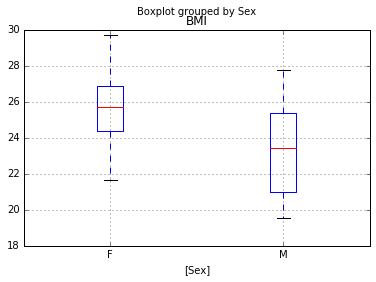

In [275]:
f_df.ix[:,['BMI','Sex']].boxplot(by='Sex')

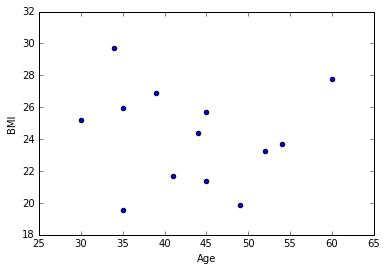

In [277]:
 f_df.plot.scatter(x='Age', y='BMI')